In [7]:
import xarray as xr
import matplotlib.pyplot as plt


In [2]:
ds_tasmax = xr.open_dataset("tasmaxAdjust_FR-Metro_EC-Earth3-Veg_historical_r1i1p1f1_KNMI_RACMO23E_v1-r1_MF-CDFt-ANASTASIA-SAFRAN-1985-2014_day_19500101-20141231.nc")
ds_tasmax

<xarray.Dataset> Size: 2GB
Dimensions:         (y: 134, x: 143, nbounds: 4, time: 23376, bnds: 2)
Coordinates:
    lon             (y, x) float64 153kB ...
    lat             (y, x) float64 153kB ...
  * x               (x) float64 1kB 6e+04 6.8e+04 ... 1.188e+06 1.196e+06
  * y               (y) float64 1kB 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * time            (time) datetime64[ns] 187kB 1951-01-01T12:00:00 ... 2014-...
Dimensions without coordinates: nbounds, bnds
Data variables:
    lon_bnds        (y, x, nbounds) float64 613kB ...
    lat_bnds        (y, x, nbounds) float64 613kB ...
    LambertParisII  int32 4B ...
    tasmaxAdjust    (time, y, x) float32 2GB ...
    time_bnds       (time, bnds) datetime64[ns] 374kB ...
Attributes: (12/71)
    title:                           RACMO23E model output corrected over met...
    summary:                         Data were post-processed by the Météo-Fr...
    id:                              hdl:21.14103/14d08250-8908-443e-b70c-8f8...
    Conventions:                     CF-1.11 ACDD-1.3
    standard_name_vocabulary:        CF Standard Name Table v81
    input_domain:                    Europe
    ...                              ...
    date_created:                    2025-11-13T17:55:44.501920
    product:                         bias-adjusted output
    license:                         CORDEX model data produced by KNMI is li...
    product_version:                 v1
    comment:                         Preliminary data released in the Fall 20...
    keywords:                        temperature, climate, France, maximal ne...

/home/viretl/miniconda3/envs/earthkit/lib/python3.13/site-packages/xarray/groupers.py:513: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


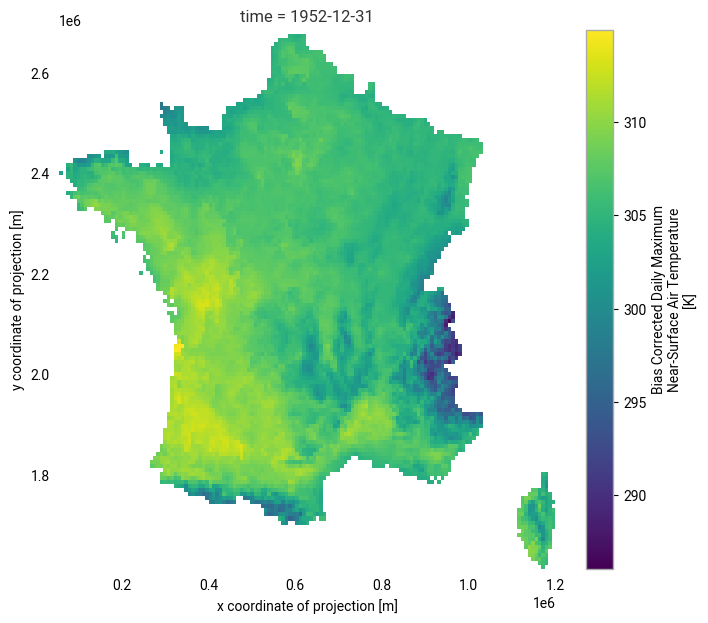

In [5]:
import pandas as pd
# Make sure time is in datetime format
ds_tasmax["time"] = pd.to_datetime(ds_tasmax.time.values)

# Resample by year and take maximum
annual_max = ds_tasmax.resample(time="1Y").max(dim="time")
# annual_max_without_nan = annual_max.dropna(dim="y")
annual_max.isel(time=1)["tasmaxAdjust"].plot()


In [72]:
ds_tasmax

<xarray.Dataset> Size: 2GB
Dimensions:         (y: 134, x: 143, nbounds: 4, time: 23376, bnds: 2)
Coordinates:
    lon             (y, x) float64 153kB ...
    lat             (y, x) float64 153kB ...
  * x               (x) float64 1kB 6e+04 6.8e+04 ... 1.188e+06 1.196e+06
  * y               (y) float64 1kB 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * time            (time) datetime64[ns] 187kB 1951-01-01T12:00:00 ... 2014-...
Dimensions without coordinates: nbounds, bnds
Data variables:
    lon_bnds        (y, x, nbounds) float64 613kB -4.14 -4.046 ... 10.85 10.74
    lat_bnds        (y, x, nbounds) float64 613kB 41.32 41.33 ... 50.87 50.87
    LambertParisII  int32 4B 1
    tasmaxAdjust    (time, y, x) float32 2GB ...
    time_bnds       (time, bnds) datetime64[ns] 374kB ...
Attributes: (12/71)
    title:                           RACMO23E model output corrected over met...
    summary:                         Data were post-processed by the Météo-Fr...
    id:                              hdl:21.14103/14d08250-8908-443e-b70c-8f8...
    Conventions:                     CF-1.11 ACDD-1.3
    standard_name_vocabulary:        CF Standard Name Table v81
    input_domain:                    Europe
    ...                              ...
    date_created:                    2025-11-13T17:55:44.501920
    product:                         bias-adjusted output
    license:                         CORDEX model data produced by KNMI is li...
    product_version:                 v1
    comment:                         Preliminary data released in the Fall 20...
    keywords:                        temperature, climate, France, maximal ne...

(array([1.00000e+02, 7.98000e+02, 2.80000e+03, 7.95900e+03, 2.80590e+04,
        1.22141e+05, 2.18108e+05, 1.38588e+05, 5.39280e+04, 2.30300e+03]),
 array([286.07196045, 289.22088623, 292.36981201, 295.51876831,
        298.66769409, 301.81661987, 304.96554565, 308.11447144,
        311.26342773, 314.41235352, 317.5612793 ]),
 <BarContainer object of 10 artists>)

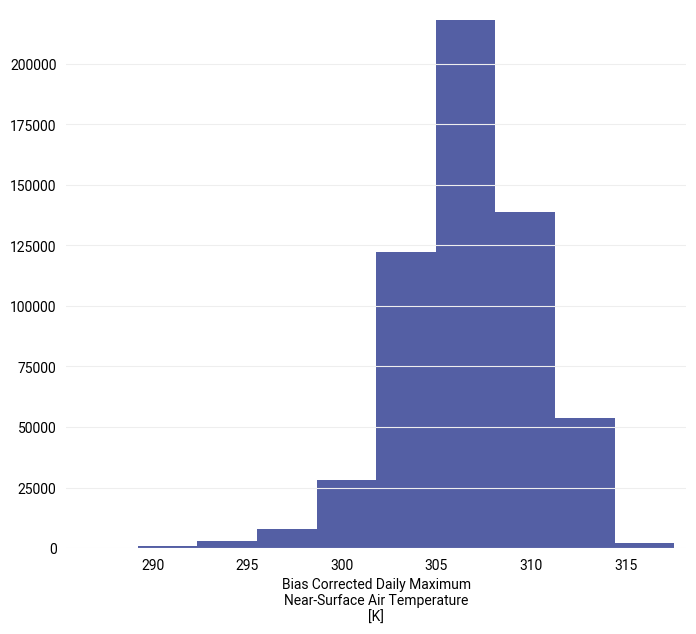

In [16]:
xr.plot.hist(annual_max.tasmaxAdjust)

No NaNs, all values are finite
Shape (c): 0.19857681324631998, Location (loc): 34.490010020280096, Scale: 1.6944220071020002
35.89034043134012


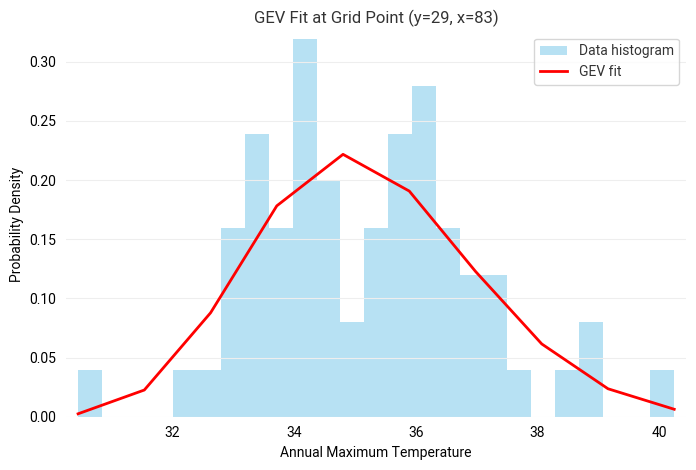

In [81]:
# PER YEAR

from scipy.stats import genextreme
import numpy as np

# Suppose your variable is named "tasmaxAdjust" inside annual_max
varname = "tasmaxAdjust"

# Example grid point indices
i, j = 29,83 # or use coordinates

# Select the dataarray for that variable
da = annual_max[varname]

# Extract the series at that grid point
y_data = np.round(da.isel(y=i, x=j).values,1) - 273.15  # now this is a 1D array over time

# Check for NaNs
if np.any(np.isnan(y_data)):
    print("There is at least one NaN in the data")
else:
    print("No NaNs, all values are finite")

# Check for missing data
if np.all(np.isfinite(y_data)):
    c, loc, scale = genextreme.fit(y_data)
    print(f"Shape (c): {c}, Location (loc): {loc}, Scale: {scale}")

        # Create a range for plotting the PDF
    x = np.linspace(np.min(y_data), np.max(y_data), int(np.round(np.max(y_data)-np.min(y_data))))

    # GEV PDF
    pdf = genextreme.pdf(x, c, loc=loc, scale=scale)

    return_period= genextreme.ppf(1-1/3, c, loc=loc, scale=scale)
    print(return_period)

    # Plot histogram and fitted PDF
    plt.figure(figsize=(8,5))
    plt.hist(y_data, bins=25, density=True, alpha=0.6, color='skyblue', label='Data histogram')
    plt.plot(x, pdf, 'r-', lw=2, label='GEV fit')
    plt.xlabel('Annual Maximum Temperature')
    plt.ylabel('Probability Density')
    plt.title(f'GEV Fit at Grid Point (y={i}, x={j})')
    plt.legend()
    plt.show()
else:
    c, loc, scale = np.nan, np.nan, np.nan
    print("Data contains missing values, parameters set to NaN")
    


In [ ]:
(da.isel(y=i, x=j)-273.15).plot()

In [96]:
# Suppose your variable is named "tasmaxAdjust" inside annual_max
varname = "tasmaxAdjust"
i, j = 29,83 # or use coordinates

def fit_gev(varname,i,j,ds,period):

    # Select the dataarray for that variable
    da = ds[varname]

# Extract the series at that grid point
    y_data = np.round(da.isel(y=i, x=j).values,1) - 273.15  # now this is a 1D array over time

    # Check for NaNs
    if np.any(np.isnan(y_data)):
        print("There is at least one NaN in the data")
    else:
        print("No NaNs, all values are finite")

    # Check for missing data
    if np.all(np.isfinite(y_data)):
        c, loc, scale = genextreme.fit(y_data)
        print(f"Shape (c): {c}, Location (loc): {loc}, Scale: {scale}")

            # Create a range for plotting the PDF
        x = np.linspace(np.min(y_data), np.max(y_data), int(np.round(np.max(y_data)-np.min(y_data))))

        # GEV PDF
        pdf = genextreme.pdf(x, c, loc=loc, scale=scale)

        return_period= genextreme.ppf(1-1/period, c, loc=loc, scale=scale)
        print(return_period)

        # # Plot histogram and fitted PDF
        # plt.figure(figsize=(8,5))
        # plt.hist(y_data, bins=25, density=True, alpha=0.6, color='skyblue', label='Data histogram')
        # plt.plot(x, pdf, 'r-', lw=2, label='GEV fit')
        # plt.xlabel('Annual Maximum Temperature')
        # plt.ylabel('Probability Density')
        # plt.title(f'GEV Fit at Grid Point (y={i}, x={j})')
        # plt.legend()
        # plt.show()
    else:
        c, loc, scale = np.nan, np.nan, np.nan
        print("Data contains missing values, parameters set to NaN")

    return return_period

fit_gev(varname,i,j,annual_max,100)  

No NaNs, all values are finite
Shape (c): 0.19857681324631998, Location (loc): 34.490010020280096, Scale: 1.6944220071020002
39.600110755707085


np.float64(39.600110755707085)

No NaNs, all values are finite
Shape (c): 0.19857681324631998, Location (loc): 34.490010020280096, Scale: 1.6944220071020002
-inf
No NaNs, all values are finite
Shape (c): 0.19857681324631998, Location (loc): 34.490010020280096, Scale: 1.6944220071020002
39.10666770791241
No NaNs, all values are finite
Shape (c): 0.19857681324631998, Location (loc): 34.490010020280096, Scale: 1.6944220071020002
39.6069009262595
No NaNs, all values are finite
Shape (c): 0.19857681324631998, Location (loc): 34.490010020280096, Scale: 1.6944220071020002
39.870121257508735
No NaNs, all values are finite
Shape (c): 0.19857681324631998, Location (loc): 34.490010020280096, Scale: 1.6944220071020002
40.044688275436236
No NaNs, all values are finite
Shape (c): 0.19857681324631998, Location (loc): 34.490010020280096, Scale: 1.6944220071020002
40.17349062902702
No NaNs, all values are finite
Shape (c): 0.19857681324631998, Location (loc): 34.490010020280096, Scale: 1.6944220071020002
40.27462435181903
No NaNs, al

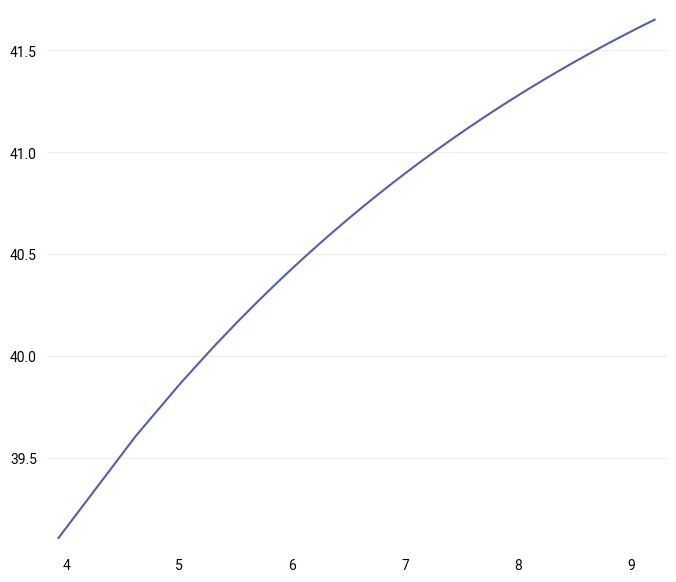

In [103]:
# Créer la liste des r
r_values = range(1, 10000, 50)

# Calculer y pour chaque r
y = [fit_gev(varname, i, j, annual_max, r) for r in r_values]

# Calculer x = log(r)
x = [np.log(r) for r in r_values]

plt.plot(x,y)

In [85]:
import geopandas as gpd

# Load the shapefile
shapefile_path = "zone_test/zone_test.shp"
gdf = gpd.read_file(shapefile_path)

# Inspect the data
print(gdf.head())

# Access geometries (as Shapely objects)
geometries = gdf.geometry

# Example: get the first geometry
first_geom = geometries.iloc[3]
print(first_geom)  # This is a Shapely object
print(first_geom.area)  # You can use Shapely methods

   id                                           geometry
0   1  POLYGON ((4.57713 46.06657, 5.23015 46.03328, ...
1   2  POLYGON ((0.3312 49.68253, 0.87922 49.67997, 1...
2   3  POLYGON ((5.69623 45.14017, 5.72312 45.13953, ...
3   4  POLYGON ((5.98081 44.07213, 5.98961 44.09278, ...
POLYGON ((5.980807765146909 44.07212879989806, 5.989610775816978 44.09277586128786, 6.03218533651222 44.08813427384364, 6.024662763757798 44.03643659299942, 5.968803659687723 44.05132168376881, 5.980807765146909 44.07212879989806))
0.0023982737607567495
